# Datacamp: Introduction to Bioconductor in R

## What is Bioconductor?
In this chapter you will get hands-on with Bioconductor. Bioconductor is the specialized repository for bioinformatics software, developed and maintained by the R community. You will learn how to install and use bioconductor packages. You will be introduced to S4 objects and functions, because most packages within Bioconductor inherit from S4. Additionally, you will use a real genomic dataset of a fungus to explore the BSgenome package.

### Bioconductor version

In [1]:
# Check R version
R.version

# Sessoion Info
sessionInfo()

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.2                         
year           2021                        
month          11                          
day            01                          
svn rev        81115                       
language       R                           
version.string R version 4.1.2 (2021-11-01)
nickname       Bird Hippie                 

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22538)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.5.0     digest_0.6.27   utf8_1.2.2      crayon_1.4.1   
 [5] IRdisplay_1.1   repr_1.1.3      lifecycle_1.0.1 jsonlite_1.7.2 
 [9] evaluate_0.14   pillar_1.6.3    rlang_0.4.11    uuid_0.1-4     
[13] vctrs_0.3.8     ellipsis_0.3.2  IRkernel_1.3    tools_4.1.2    
[17] fastmap_1.1.0   compiler_4.1.2  base64enc_0.1-3 pbdZMQ_0.3-6   
[21] htmltools_0.5.2

### BioManager to install packages
BSgenome is a Bioconductor data package that contains representations of several genomes. This package has already been installed for you, as installing the dependencies usually takes some time, using the following code:


In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("BSgenome")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'BSgenome'"
Old packages: 'backports', 'brio', 'broom', 'cli', 'cpp11', 'crayon', 'DBI',
  'digest', 'dtplyr', 'fansi', 'fs', 'generics', 'glmnet', 'glue', 'jsonlite',
  'knitr', 'languageserver', 'mvtnorm', 'openssl', 'pillar', 'pkgload',
  'raster', 'Rcpp', 'readr', 'remotes', 'repr', 'rex', 'rJava', 'rjson',
  'rlang', 'rsconnect', 'rvest', 'sp', 'stringi', 'testthat', 'tibble',
  'tinytex', 'tzdb', 'uuid', 'vroom', 'withr', 'xfun', 'xgboost', 'xml2',
  'yaml', 'class', 'foreign', 'later', 'MASS', 'nlme', 'nnet', 'rpart',
  'spatial'



In [3]:
# Load the BSgenome package
library("BSgenome")
# Check the version of the BSgenome package
packageVersion("BSgenome")

[1] '1.60.0'

### S4 class definition
We will use the class `BSgenome`, which is already loaded for you.

Let's check the formal definition of this class by using the function `showClass("className")`. Check the BSgenome class results and find its parent classes (Extends) and the classes that inherit from it (Subclasses).

In [8]:
showClass("BSgenome")

Class "BSgenome" [package "BSgenome"]

Slots:
                                                                     
Name:               pkgname     single_sequences   multiple_sequences
Class:            character OnDiskNamedSequences        RdaCollection
                                                                     
Name:               seqinfo        user_seqnames   injectSNPs_handler
Class:              Seqinfo            character    InjectSNPsHandler
                                                                     
Name:           .seqs_cache         .link_counts             metadata
Class:          environment          environment                 list

Extends: "Annotated"

Known Subclasses: "MaskedBSgenome"


### Interaction with classes

#### Let's say we have an object called a_genome from class BSgenome. With a_genome, you can ask questions like these:

```
# What is a_genome's main class?
class(a_genome)  # "BSgenome"

# What is a_genome's other classes?
is(a_genome)  # "BSgenome", "GenomeDescription"

# Is a_genome an S4 representation?
isS4(a_genome)  # TRUE

```
If you want to find out more about the a_genome object, you can use the accessor `show(a_genome)` or use other specific accessors from the list of .S4methods(class = "BSgenome").

In [1]:
# test S4 method
.S4methods(class = "BSgenome")

no methods found

In [6]:
library('BSgenome.Scerevisiae.UCSC.sacCer3')
a_genome <- BSgenome.Scerevisiae.UCSC.sacCer3

In [7]:
# Investigate the a_genome using show()
show(a_genome)

# Investigate some other accesors
organism(a_genome)
provider(a_genome)
seqinfo(a_genome)

Yeast genome:
# organism: Saccharomyces cerevisiae (Yeast)
# genome: sacCer3
# provider: UCSC
# release date: April 2011
# 17 sequences:
#   chrI    chrII   chrIII  chrIV   chrV    chrVI   chrVII  chrVIII chrIX  
#   chrX    chrXI   chrXII  chrXIII chrXIV  chrXV   chrXVI  chrM           
# (use 'seqnames()' to see all the sequence names, use the '$' or '[[' operator
# to access a given sequence)


[1] "Saccharomyces cerevisiae"

[1] "UCSC"

Seqinfo object with 17 sequences (1 circular) from sacCer3 genome:
  seqnames seqlengths isCircular  genome
  chrI         230218      FALSE sacCer3
  chrII        813184      FALSE sacCer3
  chrIII       316620      FALSE sacCer3
  chrIV       1531933      FALSE sacCer3
  chrV         576874      FALSE sacCer3
  ...             ...        ...     ...
  chrXIII      924431      FALSE sacCer3
  chrXIV       784333      FALSE sacCer3
  chrXV       1091291      FALSE sacCer3
  chrXVI       948066      FALSE sacCer3
  chrM          85779       TRUE sacCer3

In [4]:
# available genomes in BSgenome
available.genomes()

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org




[1] "BSgenome.Alyrata.JGI.v1"                   
  [2] "BSgenome.Amellifera.BeeBase.assembly4"     
  [3] "BSgenome.Amellifera.NCBI.AmelHAv3.1"       
  [4] "BSgenome.Amellifera.UCSC.apiMel2"          
  [5] "BSgenome.Amellifera.UCSC.apiMel2.masked"   
  [6] "BSgenome.Aofficinalis.NCBI.V1"             
  [7] "BSgenome.Athaliana.TAIR.04232008"          
  [8] "BSgenome.Athaliana.TAIR.TAIR9"             
  [9] "BSgenome.Btaurus.UCSC.bosTau3"             
 [10] "BSgenome.Btaurus.UCSC.bosTau3.masked"      
 [11] "BSgenome.Btaurus.UCSC.bosTau4"             
 [12] "BSgenome.Btaurus.UCSC.bosTau4.masked"      
 [13] "BSgenome.Btaurus.UCSC.bosTau6"             
 [14] "BSgenome.Btaurus.UCSC.bosTau6.masked"      
 [15] "BSgenome.Btaurus.UCSC.bosTau8"             
 [16] "BSgenome.Btaurus.UCSC.bosTau9"             
 [17] "BSgenome.Carietinum.NCBI.v1"               
 [18] "BSgenome.Celegans.UCSC.ce10"               
 [19] "BSgenome.Celegans.UCSC.ce11"               
 [20] "BSgenome.Celegans.UCSC.ce2"                
 [21] "BSgenome.Celegans.UCSC.ce6"                
 [22] "BSgenome.Cfamiliaris.UCSC.canFam2"         
 [23] "BSgenome.Cfamiliaris.UCSC.canFam2.masked"  
 [24] "BSgenome.Cfamiliaris.UCSC.canFam3"         
 [25] "BSgenome.Cfamiliaris.UCSC.canFam3.masked"  
 [26] "BSgenome.Cjacchus.UCSC.calJac3"            
 [27] "BSgenome.Creinhardtii.JGI.v5.6"            
 [28] "BSgenome.Dmelanogaster.UCSC.dm2"           
 [29] "BSgenome.Dmelanogaster.UCSC.dm2.masked"    
 [30] "BSgenome.Dmelanogaster.UCSC.dm3"           
 [31] "BSgenome.Dmelanogaster.UCSC.dm3.masked"    
 [32] "BSgenome.Dmelanogaster.UCSC.dm6"           
 [33] "BSgenome.Drerio.UCSC.danRer10"             
 [34] "BSgenome.Drerio.UCSC.danRer11"             
 [35] "BSgenome.Drerio.UCSC.danRer5"              
 [36] "BSgenome.Drerio.UCSC.danRer5.masked"       
 [37] "BSgenome.Drerio.UCSC.danRer6"              
 [38] "BSgenome.Drerio.UCSC.danRer6.masked"       
 [39] "BSgenome.Drerio.UCSC.danRer7"              
 [40] "BSgenome.Drerio.UCSC.danRer7.masked"       
 [41] "BSgenome.Dvirilis.Ensembl.dvircaf1"        
 [42] "BSgenome.Ecoli.NCBI.20080805"              
 [43] "BSgenome.Gaculeatus.UCSC.gasAcu1"          
 [44] "BSgenome.Gaculeatus.UCSC.gasAcu1.masked"   
 [45] "BSgenome.Ggallus.UCSC.galGal3"             
 [46] "BSgenome.Ggallus.UCSC.galGal3.masked"      
 [47] "BSgenome.Ggallus.UCSC.galGal4"             
 [48] "BSgenome.Ggallus.UCSC.galGal4.masked"      
 [49] "BSgenome.Ggallus.UCSC.galGal5"             
 [50] "BSgenome.Ggallus.UCSC.galGal6"             
 [51] "BSgenome.Hsapiens.1000genomes.hs37d5"      
 [52] "BSgenome.Hsapiens.NCBI.GRCh38"             
 [53] "BSgenome.Hsapiens.UCSC.hg17"               
 [54] "BSgenome.Hsapiens.UCSC.hg17.masked"        
 [55] "BSgenome.Hsapiens.UCSC.hg18"               
 [56] "BSgenome.Hsapiens.UCSC.hg18.masked"        
 [57] "BSgenome.Hsapiens.UCSC.hg19"               
 [58] "BSgenome.Hsapiens.UCSC.hg19.masked"        
 [59] "BSgenome.Hsapiens.UCSC.hg38"               
 [60] "BSgenome.Hsapiens.UCSC.hg38.dbSNP151.major"
 [61] "BSgenome.Hsapiens.UCSC.hg38.dbSNP151.minor"
 [62] "BSgenome.Hsapiens.UCSC.hg38.masked"        
 [63] "BSgenome.Mdomestica.UCSC.monDom5"          
 [64] "BSgenome.Mfascicularis.NCBI.5.0"           
 [65] "BSgenome.Mfuro.UCSC.musFur1"               
 [66] "BSgenome.Mmulatta.UCSC.rheMac10"           
 [67] "BSgenome.Mmulatta.UCSC.rheMac2"            
 [68] "BSgenome.Mmulatta.UCSC.rheMac2.masked"     
 [69] "BSgenome.Mmulatta.UCSC.rheMac3"            
 [70] "BSgenome.Mmulatta.UCSC.rheMac3.masked"     
 [71] "BSgenome.Mmulatta.UCSC.rheMac8"            
 [72] "BSgenome.Mmusculus.UCSC.mm10"              
 [73] "BSgenome.Mmusculus.UCSC.mm10.masked"       
 [74] "BSgenome.Mmusculus.UCSC.mm8"               
 [75] "BSgenome.Mmusculus.UCSC.mm8.masked"        
 [76] "BSgenome.Mmusculus.UCSC.mm9"               
 [77] "BSgenome.Mmusculus.UCSC.mm9.masked"        
 [78] "BSgenome.Osativa.MSU.MSU7"                 
 [79] "BSgenome.Ppaniscu

In [5]:
## Install yeast genome
BiocManager::install('BSgenome.Scerevisiae.UCSC.sacCer3')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BSgenome.Scerevisiae.UCSC.sacCer3'

installing the source package 'BSgenome.Scerevisiae.UCSC.sacCer3'


Old packages: 'backports', 'brio', 'broom', 'cli', 'cpp11', 'crayon', 'DBI',
  'digest', 'dtplyr', 'fansi', 'fs', 'generics', 'glmnet', 'glue', 'jsonlite',
  'knitr', 'languageserver', 'mvtnorm', 'openssl', 'pillar', 'pkgload',
  'raster', 'Rcpp', 'readr', 'remotes', 'repr', 'rex', 'rJava', 'rjson',
  'rlang', 'rsconnect', 'rvest', 'sp', 'stringi', 'testthat', 'tibble',
  'tinytex', 'tzdb', 'uuid', 'vroom', 'withr', 'xfun', 'xgboost', 'xml2',
  'yaml', 'class', 'foreign', 'later', 'MASS', 'nlme', 'nnet', 'rpart',
  'spatial'



### Discovering the yeast genome
You'll begin to explore the yeast genome for yourself using the package `BSgenome.Scerevisiae.UCSC.sacCer3`, which is already installed for you.

As with other data in R, you can use `head()` and `tail()` to explore the yeastGenome object. You can also subset the genome by chromosome by using `$` syntax as follows: `object_name$chromosome_name`.

The names of the chromosomes can be obtained using the `names()` function, and `nchar()` can be used to count the number of characters in a sequence.

In [8]:
# Load the yeast genome
library(BSgenome.Scerevisiae.UCSC.sacCer3)

# Assign data to the yeastGenome object
yeastGenome <- BSgenome.Scerevisiae.UCSC.sacCer3

### Partitioning the yeast genome
Genomes are often big, but interest usually lies in specific regions of them. Therefore, we need to subset a genome by extracting parts of it. To pick a sequence interval, use `getSeq()` and specify the name of the chromosome and the start and end of the sequence interval.

The following example will select the bases of "chrI" from 100 to 150.

`getSeq(yeastGenome, names = "chrI", start = 100, end = 150)`

Note: `names` is optional; if not specified, it will return all chromosomes. The parameters `start` and `end` are also optional and, if not specified, will take the default values 1 and the length of the sequence, respectively.

In [10]:
# Load the yeast genome
library(BSgenome.Scerevisiae.UCSC.sacCer3)

# Assign data to the yeastGenome object
yeastGenome <- BSgenome.Scerevisiae.UCSC.sacCer3

# Get the first 30 bases of chrM
getSeq(yeastGenome, names = "chrM", end = 300)

300-letter DNAString object
seq: TTCATAATTAATTTTTTATATATATATTATATTATA...AATTAATTAATTAATAATAAAAATATAATTATAAAT

## Biostrings and when to use them?
Biostrings are memory efficient string containers. Biostring has matching algorithms, and other utilities, for fast manipulation of large biological sequences or sets of sequences. How efficient you can become by using the right containers for your sequences? You will learn about alphabets, and sequence manipulation by using the tiny genome of a virus.

### Exploring the Zika virus sequence
It's your turn to explore the Zika virus genome, which has been loaded in your workspace as zikaVirus. The genome was downloaded from NCBI and you can apply Biostrings functions to learn more about it.

Start by checking the alphabet of the sequence.

`alphabet()` # Shows the letters included in the sequence
`alphabetFrequency()` # Shows the counts per letter
Remember from the video that each alphabet corresponds to a specific biostring container, and each alphabet usually has extra code letters and symbols.

In [12]:
# Load packages
library(Biostrings)

# read file
zikaVirus <- readDNAStringSet("zikaVirus.fasta")

# Check the alphabet of the zikaVirus
alphabet(zikaVirus)

# Check the alphabetFrequency of the zikaVirus
alphabetFrequency(zikaVirus)

# Check alphabet of the zikaVirus using baseOnly = TRUE
alphabet(zikaVirus, baseOnly = TRUE)

[1] "A" "C" "G" "T" "M" "R" "W" "S" "Y" "K" "V" "H" "D" "B" "N" "-" "+" "."

A,C,G,T,M,R,W,S,Y,K,V,H,D,B,N,-,+,.
2991,2359,3139,2305,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[1] "A" "C" "G" "T"

### Manipulating Biostrings
Using a short sequence (`dna_seq`) from the `zikaVirus` object, it is your turn to have a go with the two biological processes of **transcription** and **translation**.

In the first two parts of this exercise, you will apply these processes separately. In the last part, you'll apply them in one step.

You'll be using a very small sequence in this exercise, but remember that the power of `Biostrings` comes to light when manipulating much larger sequences.

The `Biostrings` package has already been loaded for you. Using `zikaVirus`, you will translate the first 21 characters into an AAString.

- `unlist()` the zikaVirus set and select the first 21 base pairs with `subseq()`. The resulting object will be a "DNAString" object.
- Transcribe the dna_seq into an "`RNAString`" and assign it to `rna_seq`.
- Translate the rna_seq into an "AAString" and assign it to `aa_seq`.
- Complete the processes of transcription and translation on the "`DNAString`" object dna_seq in one step, converting it directly into an "`AAString`" object, `aa_seq`.


In [8]:
# Unlist the set, select the first 21 letters, and assign to dna_seq
dna_seq <- subseq(unlist(zikaVirus), end = 21)
dna_seq

# Transcribe dna_seq into an RNAString object and print it
rna_seq <- RNAString(dna_seq) 
rna_seq

# Translate rna_seq into an AAString object and print it
aa_seq <- translate(rna_seq)
aa_seq

# Transcribe and translate dna_seq into an AAString object and print it
aa_seq <- translate(dna_seq)
aa_seq

21-letter DNAString object
seq: AGTTGTTGATCTGTGTGAGTC

21-letter RNAString object
seq: AGUUGUUGAUCUGUGUGAGUC

7-letter AAString object
seq: SC*SV*V

7-letter AAString object
seq: SC*SV*V

### From a set to a single sequence
From the video, you know that sequences can be loaded into R using the function `readDNAStringSet()`. The `zikaVirus` has been read into your environment using this function.

It is your turn to convert this set into a single sequence, explore the new sequence, and subset it.

- Create a new object called zikv (as the Zika Virus convention name), collating the set to one sequence.
- Check the length of the zikaVirus and the length of zikv.
- Check the width of the zikaVirus and explain why zikv does not have width.
- Subset the first 30 bases of zikv and assign to subZikv.

In [9]:
# Create zikv with one collated sequence using zikaVirus
zikv <- unlist(zikaVirus)

# Check the length of zikaVirus and zikv
length(zikaVirus)
length(zikv)

# Check the width of zikaVirus
width(zikaVirus)

# Subset zikv to only the first 30 bases
subZikv <- subseq(zikv, end = 30)
subZikv

[1] 1

[1] 10794

[1] 10794

30-letter DNAString object
seq: AGTTGTTGATCTGTGTGAGTCAGACTGCGA

In [16]:
subseq(zikaVirus, start = c(20), end = c(50))

DNAStringSet object of length 1:
    width seq                                               names               
[1]    31 TCAGACTGCGACAGTTCGAGTCTGAAGCGAG                   NC_012532.1 Zika ...

### Common sequence manipulation functions
So far, you've learned the the most common sequence manipulation functions:
```
reverse()
complement()
reverseComplement()
translate()
```
In real life, you can manipulate really large sequences using these functions.

However, to see the value and the results of these functions in this exercise, you will use a small subset. The object zikv, which you have previously subsetted from the Zika genome, has only 30 bases.

In [17]:
# Reverse the zikv sequence
reverse(zikv)

# Complement the zikv sequence
complement(zikv)

# Reverse complement the zikv sequence
reverseComplement(zikv)

# Translate the zikv sequence
translate(zikv)

10794-letter DNAString object
seq: TCTTTGGTACCTAAAGGGGTGTGGCCGGCGGCTTCA...CTTGACAGCGTCAGACTGAGTGTGTCTAGTTGTTGA

10794-letter DNAString object
seq: TCAACAACTAGACACACTCAGTCTGACGCTGTCAAG...TGAAGCCGCCGGCCACACCCCTTTAGGTACCAAAGA

10794-letter DNAString object
seq: AGAAACCATGGATTTCCCCACACCGGCCGCCGAAGT...GAACTGTCGCAGTCTGACTCACACAGATCAACAACT

3598-letter AAString object
seq: SC*SV*VRLRQFESEARANNSINRFNLDLETRVSGH...AY*RGKDQRLHEFPPRWPPGTDRRTSAAGVGKSMVS

### Searching for a pattern

Let's find some occurrences of a pattern in the zikaVirus set using `vmatchPattern()`. Then, let's try the same pattern search using` matchPattern()` with a single sequence, zikv.

```
# For Sets
vmatchPattern(pattern = "ACATGGGCCTACCATGGGAG", 
              subject = zikaVirus, max.mismatch = 1)
# For single sequences
matchPattern(pattern = "ACATGGGCCTACCATGGGAG", 
              subject = zikv, max.mismatch = 1)
```

In [18]:
# For Sets
vmatchPattern(pattern = "ACATGGGCCTACCATGGGAG", 
              subject = zikaVirus, max.mismatch = 1)
# For single sequences
matchPattern(pattern = "ACATGGGCCTACCATGGGAG", 
              subject = zikv, max.mismatch = 1)

MIndex object of length 1
$`NC_012532.1 Zika virus, complete genome`
IRanges object with 1 range and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]      8561      8580        20


Views on a 10794-letter DNAString subject
subject: AGTTGTTGATCTGTGTGAGTCAGACTGCGACAGT...TTCGGCGGCCGGTGTGGGGAAATCCATGGTTTCT
views:
      start  end width
  [1]  8561 8580    20 [ACATGGGCCTACCATGGGAG]

### Finding Palindromes
It is your turn to find palindromic sequences using the zikv sequence. Remember, `findPalindromes()` can only search a single sequence, and **does not work with a set**.

In [19]:
# Find palindromes in zikv
findPalindromes(zikv)

Views on a 10794-letter DNAString subject
subject: AGTTGTTGATCTGTGTGAGTCAGACTGCGACAGT...TTCGGCGGCCGGTGTGGGGAAATCCATGGTTTCT
views:
       start   end width
   [1]    18    26     9 [AGTCAGACT]
   [2]   137   144     8 [ATCCGGAT]
   [3]   143   151     9 [ATTGTCAAT]
   [4]   363   370     8 [AAGATCTT]
   [5]   464   471     8 [GCCATGGC]
   ...   ...   ...   ... ...
  [79] 10482 10489     8 [GCCATGGC]
  [80] 10518 10526     9 [CCTCAGAGG]
  [81] 10734 10744    11 [CTGGCCGCCAG]
  [82] 10753 10767    15 [CGCCGAACTTCGGCG]
  [83] 10763 10771     9 [CGGCGGCCG]

### Finding a conserved region within six frames
Now you will be able to look for the NS5 protein sequence in the Zika virus sequence. The NS5 is a very conserved virus protein.

The Zika virus DNA sequence has been transcribed into an `RNAStringSet`, called `rnaframesZikaSet`. The set has six reading frames (one per sequence) for you to translate into amino acids. When doing the search, you will set the max.mismatch argument in your call of `vcountPattern()` to add flexibility to your search.

In [ ]:
####

## IRanges and GenomicRanges
The IRanges and GenomicRanges packages are also containers for storing and manipulating genomic intervals and variables defined along a genome. These packages provide infrastructure and support to many other Bioconductor packages because of their enriching features. You will learn how to use these containers and their associated metadata, for manipulation of your sequences. The dataset you will be looking at is a special gene of interest in the human genome.

### Constructing IRanges
Some `IRanges` constructor examples were provided. This is your turn to practice creating sequence ranges with different arguments and see how these arguments are reused or complemented.

Using the `IRanges()` function, you can specify parameters such as start, end, or width. These parameter inputs can fall into one of two categories:

`start`, `end`, and `width` are numeric vectors.
- The start parameter is a logical vector.
- Missing arguments will be resolved using the equation width = end - start + 1.

The IRanges() constructor indicates that all of the parameters are optional with default NULL:
```
IRanges(start = NULL, end = NULL, width = NULL, names = NULL)
```

Construct three IRanges objects with the following arguments:
- IRnum1: A start equal to a vector of values 1 through 5 and end equal to 100.
- IRnum2: An end equal to 100 and width equal to both 89 and 10.
- IRlog1: start equal to Rle(c(F, T, T, T, F, T, T, T)).
- Print the objects and see the results!

In [20]:
# Load IRanges package
library(IRanges)

# IRnum1: start - vector 1 through 5, end - 100  
IRnum1 <- IRanges(start = 1:5, end = 100)

# IRnum2: end - 100, width - 89 and 10
IRnum2 <- IRanges(end = 100, width = c(89,100))

# IRlog1: start = Rle(c(F, T, T, T, F, T, T, T)))
IRlog1 <- IRanges(start = Rle(c(F, T, T, T, F, T, T, T)))

# Print objects in a list
print(list(IRnum1 = IRnum1, IRnum2 = IRnum2, IRlog1 = IRlog1))

$IRnum1
IRanges object with 5 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1       100       100
  [2]         2       100        99
  [3]         3       100        98
  [4]         4       100        97
  [5]         5       100        96

$IRnum2
IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]        12       100        89
  [2]         1       100       100

$IRlog1
IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         2         4         3
  [2]         6         8         3



### Interacting with IRanges
You can use the `IRanges()` function to create a single sequence. You can also provide vectors to `IRanges()` to create multiple sequence ranges at the same time. This is both fascinating and useful! The creation of objects seq_1 and seq_2 are examples of this.

For this exercise, check the width of each of the sequences provided here, using `width()` and `lengths()`. Notice the difference between the two types of outputs.

Remember that `width = end - start + 1`.



In [24]:
# Create the first sequence seq_1
seq_1 <- IRanges(start = 10, end = 37)

# Create the second sequence seq_2
seq_2 <- IRanges(start = c(5, 35, 50),
                 end = c(12, 39, 61),
                 names = LETTERS[1:3])

In [23]:
# Check the width of seq_1 and seq_2
width(seq_1)
width(seq_2)

[1] 28

[1]  8  5 12

In [22]:
# Check the width of seq_1 and seq_2
length(seq_1)
length(seq_2)

[1] 1

[1] 3

### From tabular data to Genomic Ranges:
to create GRanges objects. You can define a `GRange` with a range's name, start, and end positions (seqnames, start, and end). If you have data in table format, you can also transform it into a GRanges object. Let's use a data frame, called seq_intervals, as this is most likely where you have stored your sequence intervals. Note: you can also use a tibble if you are more familiar with them.

You will use the predefined seq_intervals data frame to transform into a GRanges object using the `as()` function. The as() function was introduced in the last video - it takes in an object and the name of the class to convert the object to.

In [31]:
# create dataframe
seq_intervals <- data.frame(seqnames = c('chrI','chrI','chrII','chrII'), start = 11:14, end= 36:39, score = c(100,182,77,88))
seq_intervals

seqnames,start,end,score
<chr>,<int>,<int>,<dbl>
chrI,11,36,100
chrI,12,37,182
chrII,13,38,77
chrII,14,39,88


In [32]:
# Load GenomicRanges package
library(GenomicRanges)

# Print seq_intervals
print(seq_intervals)

# Create myGR
seq_intervals <- as(seq_intervals, "GRanges")

# Print myGR
seq_intervals 

  seqnames start end score
1     chrI    11  36   100
2     chrI    12  37   182
3    chrII    13  38    77
4    chrII    14  39    88


GRanges object with 4 ranges and 1 metadata column:
      seqnames    ranges strand |     score
         <Rle> <IRanges>  <Rle> | <numeric>
  [1]     chrI     11-36      * |       100
  [2]     chrI     12-37      * |       182
  [3]    chrII     13-38      * |        77
  [4]    chrII     14-39      * |        88
  -------
  seqinfo: 2 sequences from an unspecified genome; no seqlengths

### GenomicRanges accessors
In the previous exercise, you created a GRanges object from a data frame containing the basic information. You will discover that GRanges can store much more!

Use the accessor method to explore the GRanges object, myGR. You can extract characteristics from a GRanges object such as chromosome names, the number of sequences, the names of each sequence, information about strand, score, length, and more.

The following are basic accessors for `GRanges`:
```
seqnames(gr)
ranges(gr)
mcols(gr)
genome(gr)
seqinfo(gr)
```


In [33]:
gr <- as(seq_intervals, "GRanges")
seqnames(gr)
ranges(gr)
mcols(gr)
genome(gr)
seqinfo(gr)

factor-Rle of length 4 with 2 runs
  Lengths:     2     2
  Values : chrI  chrII
Levels(2): chrI chrII

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]        11        36        26
  [2]        12        37        26
  [3]        13        38        26
  [4]        14        39        26

DataFrame with 4 rows and 1 column
      score
  <numeric>
1       100
2       182
3        77
4        88

chrI chrII 
   NA    NA

Seqinfo object with 2 sequences from an unspecified genome; no seqlengths:
  seqnames seqlengths isCircular genome
  chrI             NA         NA   <NA>
  chrII            NA         NA   <NA>

### Human genome chromosome X
It is your turn to use the `TxDb.Hsapiens.UCSC.hg38.knownGene` package and extract information from it. Like in the video, you will **subset all genes in chromosome X**, using the function `genes()` with the argument filter set to select instances where `tx_chrom = "chrX"`. Then, you will explore this subset of genes.

Remember that filter receives a `list()` of filter conditions to select specific genome intervals.

If you would like to test other filters, valid names for this list are: `"gene_id", "tx_id", "tx_name", "tx_chrom", "tx_strand", "exon_id", "exon_name", "exon_chrom", "exon_strand", "cds_id", "cds_name", "cds_chrom", "cds_strand", and "exon_rank"`

#### Installation [TxDb.Hsapiens.UCSC.hg38.knownGene](https://www.bioconductor.org/packages/release/data/annotation/html/TxDb.Hsapiens.UCSC.hg38.knownGene.html)


In [1]:
# To install this package, start R (version "4.1") and enter:

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("TxDb.Hsapiens.UCSC.hg38.knownGene")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'TxDb.Hsapiens.UCSC.hg38.knownGene'

installing the source package 'TxDb.Hsapiens.UCSC.hg38.knownGene'


Old packages: 'backports', 'brio', 'broom', 'cli', 'cpp11', 'crayon', 'DBI',
  'digest', 'dtplyr', 'fansi', 'fs', 'generics', 'glmnet', 'glue', 'jsonlite',
  'knitr', 'languageserver', 'magrittr', 'mvtnorm', 'openssl', 'pillar',
  'pkgload', 'raster', 'Rcpp', 'readr', 'remotes', 'repr', 'rex', 'rJava',
  'rjson', 'rlang', 'rsconnect', 'rvest', 'sp', 'stringi', 'testthat',
  'tibble', 'tinytex', 'tzdb', 'uuid', 'vroom', 'withr', 'xfun', 'xgboost',
  'xml2', 'yaml', 'foreign', 'later', 'rpart'



In [3]:
# Load human reference genome hg38
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

# Assign hg38 to hg, then print it
hg <- TxDb.Hsapiens.UCSC.hg38.knownGene
hg

# Extract all the genes in chromosome X as hg_chrXg, then print it
hg_chrXg <- genes(hg, filter = list(tx_chrom = c("chrX")))
hg_chrXg

TxDb object:
# Db type: TxDb
# Supporting package: GenomicFeatures
# Data source: UCSC
# Genome: hg38
# Organism: Homo sapiens
# Taxonomy ID: 9606
# UCSC Table: knownGene
# UCSC Track: GENCODE V36
# Resource URL: http://genome.ucsc.edu/
# Type of Gene ID: Entrez Gene ID
# Full dataset: yes
# miRBase build ID: NA
# Nb of transcripts: 232184
# Db created by: GenomicFeatures package from Bioconductor
# Creation time: 2021-04-28 16:32:07 +0000 (Wed, 28 Apr 2021)
# GenomicFeatures version at creation time: 1.41.3
# RSQLite version at creation time: 2.2.6
# DBSCHEMAVERSION: 1.2

  30 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



GRanges object with 1071 ranges and 1 metadata column:
            seqnames              ranges strand |     gene_id
               <Rle>           <IRanges>  <Rle> | <character>
      10009     chrX 120250752-120258398      + |       10009
  100093698     chrX   13310652-13319933      + |   100093698
  100124540     chrX   47388649-47388777      + |   100124540
  100126270     chrX 147909431-147911817      - |   100126270
  100126301     chrX 147258760-147258850      - |   100126301
        ...      ...                 ...    ... .         ...
       9823     chrX 101655281-101659850      - |        9823
       9843     chrX   66162549-66268867      + |        9843
       9947     chrX 141903894-141909374      + |        9947
       9949     chrX 110194186-110440233      - |        9949
       9968     chrX   71118556-71142454      + |        9968
  -------
  seqinfo: 595 sequences (1 circular) from hg38 genome

In [4]:
# Extract all positive stranded genes in chromosome X, assign to hg_chrXgp, then sort it
hg_chrXgp <- genes(hg, filter = list(tx_chrom = "chrX", tx_strand = "+"))
sort(hg_chrXgp)

GRanges object with 578 ranges and 1 metadata column:
            seqnames              ranges strand |     gene_id
               <Rle>           <IRanges>  <Rle> | <character>
      55344     chrX       276322-303356      + |       55344
       6473     chrX       624344-659411      + |        6473
       1438     chrX     1268800-1310381      + |        1438
  100500894     chrX     1293918-1293992      + |   100500894
       3563     chrX     1336616-1382689      + |        3563
        ...      ...                 ...    ... .         ...
  100302111     chrX 155457517-155457615      + |   100302111
  100507404     chrX 155466540-155611616      + |   100507404
      10251     chrX 155612572-155782459      + |       10251
       6845     chrX 155881345-155943769      + |        6845
       3581     chrX 155997581-156022236      + |        3581
  -------
  seqinfo: 595 sequences (1 circular) from hg38 genome

### A sequence window

To temporarily partition sections of your sequences, you will use the concept of windows of given widths that can move in steps. As you have seen in the video, GRanges provides the `slidingWindows()` function, with arguments such as `width` and `step`.
```
slidingWindows(x, width, step = 1L)
```

The GRanges object called ABCD1, with gene id 215 and length 19895, has been pre-loaded for this exercise. Use the `ranges()` function to see its structure.
```
ranges(ABCD1)
```

`GRangesLists` also come with useful accessor functions; almost all the accessors from IRanges and GRanges are reused, but they instead result in a list. You can find accessors using the function `methods(class = "GRangesList")`.

In [5]:
methods(class = "GRangesList")

  [1] !                                     
  [2] !=                                    
  [3] $                                     
  [4] $<-                                   
  [5] %in%                                  
  [6] [                                     
  [7] [[                                    
  [8] [[<-                                  
  [9] [<-                                   
 [10] <                                     
 [11] <=                                    
 [12] ==                                    
 [13] >                                     
 [14] >=                                    
 [15] aggregate                             
 [16] anyDuplicated                         
 [17] anyNA                                 
 [18] append                                
 [19] as.character                          
 [20] as.complex                            
 [21] as.data.frame                         
 [22] as.env                                
 [23] as.i

### How many transcripts?
Remember in the video how we discovered the length of the exons in one of the transcripts of our gene of interest? It is your turn to find out how many transcripts the gene ABCD1 has. You can find out by using:
```
transcriptsBy(x, by = "gene")
```

In [7]:
# Load the human transcripts DB to hg
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
hg <- TxDb.Hsapiens.UCSC.hg38.knownGene

# Prefilter chromosome X "chrX" using seqlevels()
seqlevels(hg) <- c("chrX")

# Get all transcripts by gene and print it
hg_chrXt <- transcriptsBy(hg, by = "gene")
hg_chrXt


GRangesList object of length 1075:
$`10009`
GRanges object with 2 ranges and 2 metadata columns:
      seqnames              ranges strand |     tx_id           tx_name
         <Rle>           <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 120250752-120258398      + |    226612 ENST00000326624.2
  [2]     chrX 120250812-120258398      + |    226613 ENST00000557385.2
  -------
  seqinfo: 1 sequence from hg38 genome

$`100093698`
GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     tx_id           tx_name
         <Rle>         <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 13310652-13319933      + |    224200 ENST00000431486.1
  -------
  seqinfo: 1 sequence from hg38 genome

$`100124540`
GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     tx_id           tx_name
         <Rle>         <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 47388649-47388777   

In [8]:
# Select gene `215` from the hg_chrXt
hg_chrXt$`215`

GRanges object with 3 ranges and 2 metadata columns:
      seqnames              ranges strand |     tx_id           tx_name
         <Rle>           <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 153724856-153744755      + |    227331 ENST00000218104.6
  [2]     chrX 153725817-153729897      + |    227332 ENST00000370129.4
  [3]     chrX 153735344-153740604      + |    227333 ENST00000443684.2
  -------
  seqinfo: 1 sequence from hg38 genome

In [9]:
# ABCD1 gene
ABCD1 <- hg_chrXt$`215`[1]
ABCD1 

GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     tx_id           tx_name
         <Rle>           <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 153724856-153744755      + |    227331 ENST00000218104.6
  -------
  seqinfo: 1 sequence from hg38 genome

In [10]:
# ABCD1 gene ranges
ranges(ABCD1)

IRanges object with 1 range and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1] 153724856 153744755     19900

It is your turn to explore chromosome X genes, hg_chrX, and find the gene of interest, ABCD1. You will do this by using the function `overlapsAny()` between the target ABCD1 and the subject hg_chrX.

In [11]:
overlapsAny(ABCD1,hg_chrXt)

[1] TRUE

In [13]:
# Store the overlapping range in rangefound
rangefound <- subsetByOverlaps(hg_chrXt, ABCD1)

# Print names of rangefound
names(rangefound)

# Print the gene of interest 
print(ABCD1)

# Print rangefound
print(rangefound)

[1] "215"

GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     tx_id           tx_name
         <Rle>           <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 153724856-153744755      + |    227331 ENST00000218104.6
  -------
  seqinfo: 1 sequence from hg38 genome
GRangesList object of length 1:
$`215`
GRanges object with 3 ranges and 2 metadata columns:
      seqnames              ranges strand |     tx_id           tx_name
         <Rle>           <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 153724856-153744755      + |    227331 ENST00000218104.6
  [2]     chrX 153725817-153729897      + |    227332 ENST00000370129.4
  [3]     chrX 153735344-153740604      + |    227333 ENST00000443684.2
  -------
  seqinfo: 1 sequence from hg38 genome



### From GRangesList object into a GRanges object
The `unlist()` operation is fast and serves to partition a GRangesList.

You can unlist the hg_ChrX and then check how the lengths differ between the GRangesList and the GRanges objects.

In [17]:
# Unlist hg_ChrX and save result as myGR
myGR <- unlist(hg_chrXt)

# Compare classes of hg_ChrX and myGR
hg_chrXt


GRangesList object of length 1075:
$`10009`
GRanges object with 2 ranges and 2 metadata columns:
      seqnames              ranges strand |     tx_id           tx_name
         <Rle>           <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 120250752-120258398      + |    226612 ENST00000326624.2
  [2]     chrX 120250812-120258398      + |    226613 ENST00000557385.2
  -------
  seqinfo: 1 sequence from hg38 genome

$`100093698`
GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     tx_id           tx_name
         <Rle>         <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 13310652-13319933      + |    224200 ENST00000431486.1
  -------
  seqinfo: 1 sequence from hg38 genome

$`100124540`
GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     tx_id           tx_name
         <Rle>         <IRanges>  <Rle> | <integer>       <character>
  [1]     chrX 47388649-47388777   

In [18]:
myGR

GRanges object with 5497 ranges and 2 metadata columns:
            seqnames              ranges strand |     tx_id           tx_name
               <Rle>           <IRanges>  <Rle> | <integer>       <character>
      10009     chrX 120250752-120258398      + |    226612 ENST00000326624.2
      10009     chrX 120250812-120258398      + |    226613 ENST00000557385.2
  100093698     chrX   13310652-13319933      + |    224200 ENST00000431486.1
  100124540     chrX   47388649-47388777      + |    224935 ENST00000408532.1
  100124541     chrX   52190621-52190748      + |    225251 ENST00000408548.1
        ...      ...                 ...    ... .       ...               ...
       9968     chrX   71126261-71127386      + |    225572 ENST00000471663.5
       9968     chrX   71126374-71127691      + |    225573 ENST00000462984.1
       9968     chrX   71128315-71128820      + |    225574 ENST00000489199.1
       9968     chrX   71129183-71129862      + |    225575 ENST00000460771.1
       9

### From GRangesList object into a GRanges object
The `unlist()` operation is fast and serves to partition a GRangesList.

You can unlist the hg_ChrX and then check how the lengths differ between the GRangesList and the GRanges objects.

In [19]:
# Unlist hg_ChrX and save result as myGR
myGR <- unlist(hg_chrXt)

# Compare classes of hg_ChrX and myGR
class(hg_chrXt)
class(myGR)

# Compare length of hg_ChrX and myGR
length(hg_chrXt)
length(myGR)

[1] "CompressedGRangesList"
attr(,"package")
[1] "GenomicRanges"

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

[1] 1075

[1] 5497

## Introducing ShortRead
ShortRead is the package for input, manipulation and assessment of fasta and fastq files. You can subset, trim and filter the sequences of interest, and even do a report of quality. An extra bonus towards the last exercises will give you the tools for parallel quality assessment, wink, wink Rqc. Exciting enough, for this you will use plant genome sequences!

#### Install [ShortRead](https://bioconductor.org/packages/release/bioc/html/ShortRead.html) Package

In [3]:
# Install ShortRead Package
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ShortRead")


In [15]:
# load shortRead & tidyverse
library(ShortRead)
library(tidyverse)
library(ggplot2)

In [6]:
fqsample <- readFastq(dirPath = "data", 
                      pattern = "SRR1971253.fastq")
fqsample

class: ShortReadQ
length: 60836 reads; width: 50 cycles

In [11]:
# extract reads                      
abc <- alphabetByCycle(sread(fqsample))
# Transpose nucleotides A, C, G, T per column
nucByCycle <- t(abc[1:4,]) 

# Tidy dataset
nucByCycle <- nucByCycle %>% 
  as_tibble() %>% # convert to tibble
  mutate(cycle = 1:50) # add cycle numbers

In [13]:
# Glimpse nucByCycle
glimpse(nucByCycle)

Rows: 50
Columns: 5
$ A     <int> 16839, 13056, 13666, 14723, 16316, 15524, 15562, 15708, 14793, 1~
$ C     <int> 16335, 13327, 15617, 15439, 14082, 15195, 14212, 15014, 15488, 1~
$ G     <int> 16740, 12064, 13198, 14239, 14445, 15146, 16181, 14712, 14859, 1~
$ T     <int> 10878, 22389, 18355, 16435, 15990, 14971, 14881, 15402, 15696, 1~
$ cycle <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1~


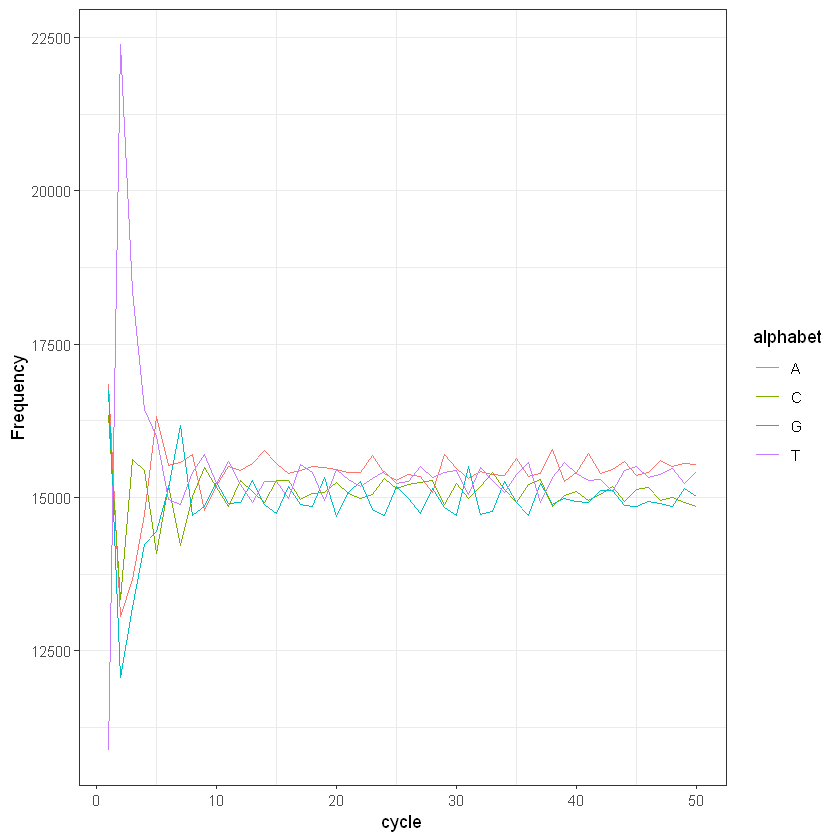

In [16]:
# Create a line plot of cycle vs. count
nucByCycle %>% 
  # Gather the nucleotide letters in alphabet and get a new count column
  gather(key = alphabet, value = count , -cycle) %>% 
  ggplot(aes(x = cycle, y =  count, color = alphabet)) +
  geom_line(size = 0.5 ) +
  labs(y = "Frequency") +
  theme_bw() +
  theme(panel.grid.major.x = element_blank())

### Filtering reads on the go!
What if, from all of the reads in a file, you are only interested in some of those reads? You can use a filter!

Let's say that you are interested only in those reads that start with the pattern "ATGCA". A tiny filtering function can do the job, making use of the srFilter() function:

`myStartFilter <- srFilter(function(x) substr(sread(x), 1, 5) == "ATGCA")`

In [17]:
myStartFilter <- srFilter(function(x) substr(sread(x), 1, 5) == "ATGCA")

In [18]:
# Check class of fqsample
class(fqsample)

# Filter reads into selectedReads using myStartFilter
selectedReads <- fqsample[myStartFilter(fqsample)]

# Check class of selectedReads
class(selectedReads)

# Check detail of selectedReads
detail(selectedReads)

[1] "ShortReadQ"
attr(,"package")
[1] "ShortRead"

[1] "ShortReadQ"
attr(,"package")
[1] "ShortRead"

class:  ShortReadQ 

sread:
DNAStringSet object of length 91:
     width seq
 [1]    50 ATGCAGGGCCTCGGCGAACTGGGCCCAGCGATTGGTGAACTGCGCGACAC
 [2]    50 ATGCAGCTAAAGAAAACCTCAAATGCTTCATGCTCGGATTTAGTCACTTT
 [3]    50 ATGCATGACCGAAGGCGACAAGGCCGTCGCGAATGCGGCGAGCGCGAGGA
 [4]    50 ATGCAAGGCCTCGGCGTAGACCTGCCCACCGCCGATCACCATCAGCCCGG
 [5]    50 ATGCAAAAAATCCTCGCCAATCGGCTGGCTGTGCTACCGATAAACTACCT
 ...   ... ...
[87]    50 ATGCAATCGTATATATTCTTTTTTGAAGACGTGATAAACCATTCGCCGTG
[88]    50 ATGCAATGCTCACTACTCGCCGACGGATTCAAATCCTCGGTCCCGGAAGG
[89]    50 ATGCATGTGCCTCACTTAACCAAGTAGTCTCAATCAGAACCGTTCATTTA
[90]    50 ATGCATAATTTATATGAGGGTTTGTAAAAATATTCTATTTTCTTAGGGTT
[91]    50 ATGCAAGTATTGTGGGGAGATTCATCCGATCGGTGGGCCGCACGTATGTA

id:
BStringSet object of length 91:
     width seq
 [1]    61 SRR1971253.299 HS2:546:C4DUWACXX:3:1101:18454:65432 length=50
 [2]    62 SRR1971253.1171 HS2:546:C4DUWACXX:3:1103:10297:40727 length=50
 [3]    62 SRR1971253.1903 HS2:546:C4DUWACXX:3:1104:18590:77349 length=50
 [4]    61 SRR1

### Removing duplicates

In [19]:
# Get the reads from dfqsample
mydReads <- sread(fqsample)

# Counting duplicates
table(srduplicated(mydReads))


FALSE  TRUE 
60575   261 

In [21]:
# Remove duplicates
mydReads[srduplicated(mydReads) == FALSE]

DNAStringSet object of length 60575:
        width seq
    [1]    50 TGGAAAGGGGCGCCAGAGAGGGTGAGAGCCCCGTCGTGCCCGGACCCTGT
    [2]    50 GGTGGAGATGACGCGATCCGCCTCACGACGAATCGCGGCGCCTGTCAGCG
    [3]    50 ATTCCCGCGCTTGCATGATGCCATGGCAACGACGTTTTGTGCCTACGCTG
    [4]    50 AAACTTCGTTTCATCAACAGTAAGAGCCAAAAGGCTTCTAACAGTCTATA
    [5]    50 TACCCAATGCCAAATAGCTGCCAAGAAGCACAAACCAGAAAACACTATAT
    ...   ... ...
[60571]    50 CGTTTCCTCTGAAGCTCGTTGGAGGGAGAGATCATGCAGCCCTCGCAAAT
[60572]    50 GTGTTCAGGCGATCATGGGCCAAGACAGCGACACCAGCAGCGCCCAGCCA
[60573]    50 TGTAGGCCGACATCGCCGACCCGGACGCCGTGCAGCGCCTGTTCGACGCG
[60574]    50 CGGTAGACGAACTTGAGGTGGTCGTTGCGCAGGAGCCCACCGGGCAGCAG
[60575]    50 GAAGGTCACCGGACTCACTTTGATATAATACTTGTTGCGCGAGTCCGCCG

### More filtering!
Awesome! Now that you've had some practice with filtering reads, let's use the function `polynFilter()`. This function selects reads that contain less than a given number of duplicate nucleotides. For example,
 `polynFilter(threshold = 20, nuc = c("A"))` 
 will select all reads that contain less than 20 A's. The parameter nuc is a character vector containing IUPAC symbols for nucleotides or the value "other" for all non-nucleotide symbols.

 -To check the reads of a ShortRead object, call `sread()`. This function extracts sequences from read objects.

In [22]:
# Check reads of fqsample
sread(fqsample)

# Create myFil using polynFilter
myFil <- polynFilter(threshold = 3, nuc = c("A"))

# Apply your filter to fqsample
filterCondition <- myFil(fqsample)

# Use myFil with fqsample
filteredSequences <- fqsample[filterCondition]

# Check reads of filteredSequences
sread(filteredSequences)

DNAStringSet object of length 60836:
        width seq
    [1]    50 TGGAAAGGGGCGCCAGAGAGGGTGAGAGCCCCGTCGTGCCCGGACCCTGT
    [2]    50 GGTGGAGATGACGCGATCCGCCTCACGACGAATCGCGGCGCCTGTCAGCG
    [3]    50 ATTCCCGCGCTTGCATGATGCCATGGCAACGACGTTTTGTGCCTACGCTG
    [4]    50 AAACTTCGTTTCATCAACAGTAAGAGCCAAAAGGCTTCTAACAGTCTATA
    [5]    50 TACCCAATGCCAAATAGCTGCCAAGAAGCACAAACCAGAAAACACTATAT
    ...   ... ...
[60832]    50 CGTTTCCTCTGAAGCTCGTTGGAGGGAGAGATCATGCAGCCCTCGCAAAT
[60833]    50 GTGTTCAGGCGATCATGGGCCAAGACAGCGACACCAGCAGCGCCCAGCCA
[60834]    50 TGTAGGCCGACATCGCCGACCCGGACGCCGTGCAGCGCCTGTTCGACGCG
[60835]    50 CGGTAGACGAACTTGAGGTGGTCGTTGCGCAGGAGCCCACCGGGCAGCAG
[60836]    50 GAAGGTCACCGGACTCACTTTGATATAATACTTGTTGCGCGAGTCCGCCG

DNAStringSet object of length 717:
      width seq
  [1]    50 GCGCCGCTGAGCCCACGTTCCACCTGCGGCCGCCTGCGTCGGCGGTCGCC
  [2]    50 CCTGCGCGCGCATCGGTGCCATCCATTCGGTGGTCTTCGGCGGCTTCTCG
  [3]    50 GTGCCCGGTGCTCCCGGCGTGCCTGCTGCTCCTGGCTACTCTGGCACTCC
  [4]    50 CCACCAGGTCGCCCTGGCCCGGTTCTTCCATTTCCTTGTTGGCCTTGCCG
  [5]    50 GTCCGCAGCGGCGGGGGGGGGCGGGGCGGCTTTGTTAGGGGGGGGGGGGG
  ...   ... ...
[713]    50 CCGGCTTGCTGTCGCTGGCTGCCGTGTTCGCGGTCGCTCTTATCAGCCCC
[714]    50 TCGGGGGCGTCTTCGGCTGCTGGGTTAGCCCCAGTATTTGGGTCCTCTGC
[715]    50 AGTGGGTTCGGCGCTGGGGCCGTGCCGGGTGCGGTGGCGTTCGAAGCGGC
[716]    50 TGTGGCTCTTTTCGGTATTTTGTGCGGCTATTTTCGCTGGCTTGGCTTTA
[717]    50 CGACCGCGTCACGCTCGCCGGCCGTCTGGCGCGCGGCGATGCGCGCCTCG

In [24]:
# install Rqc Package
# BiocManager::install("Rqc")
# Load package Rqc
library(Rqc)

In [27]:
# Average per cycle quality plot
library(Rqc)
files <- 'data/SRR1971253.fastq'# get the full path of the files you want to assess
qaRqc <- rqcQA(files)# exploring qaRqc
class(qaRqc)# "list"
names(qaRqc)# name of the input files# for each file
qaRqc[1]# the class of the results is RqcResultSet



[1] "list"

[1] "SRR1971253.fastq"

$SRR1971253.fastq
class: RqcResultSet(3)
QA elements (access with qa[["elt"]]):
  perFile: list(2)
    information: data.frame(1 7)
    topReads: data.frame(10 2)
  perCycle: list(2)
    quality: data.frame(4700 4)
    baseCall: data.frame(250 3)
  perRead: list(3)
    width: data.frame(1 2)
    averageQuality: data.frame(1806 2)
    frequency: data.frame(5 2)


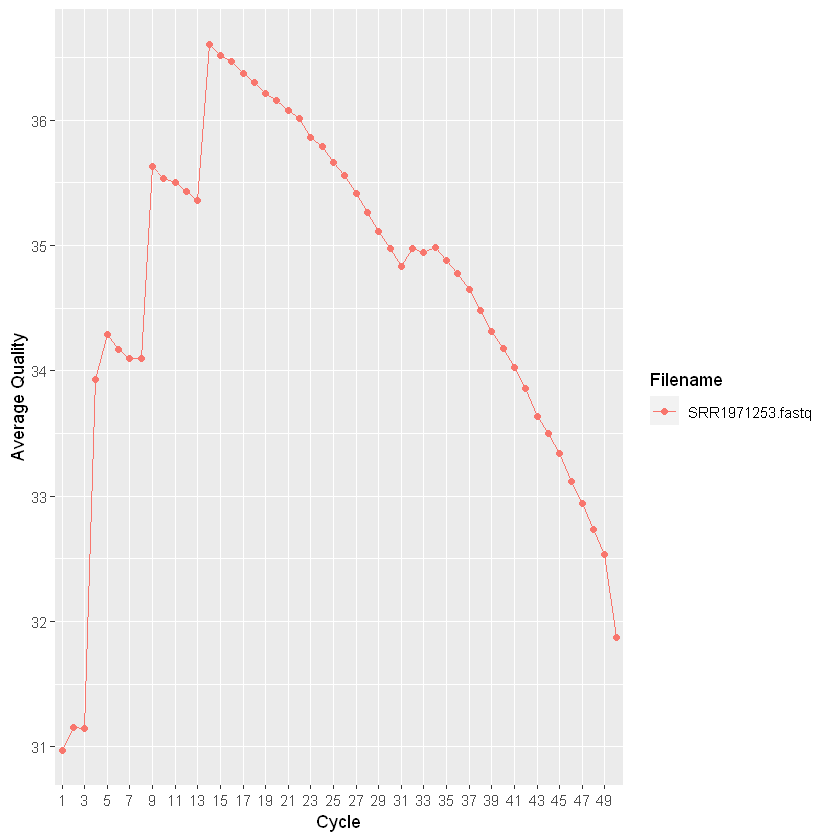

In [28]:
rqcCycleAverageQualityPlot(qaRqc)

### rqcQAarguments

```
# get the path of the files you want to assess
files <-"data/seq1.fq""data/seq2.fq""data/seq3.fq""data/se4.fq"

qaRqc <- rqcQA(files, workers =4)
# sample of sequences
set.seed(1111)
qaRqc_sample <- rqcQA(files, workers =4, sample =TRUE, n =500))
# paired-end 
filespfiles <-"data/seq_11.fq""data/seq1_2.fq""data/seq2_1.fq""data/seq2_2.fq"
qaRqc_paired <- rqcQA(pfiles, workers =4, pair =c(1,1,2,2)))

```

In [29]:
perFileInformation(qaRqc)

filename,pair,format,group,reads,total.reads,path
<fct>,<fct>,<chr>,<chr>,<int>,<int>,<chr>
SRR1971253.fastq,1,FASTQ,None,60836,60836,data
